In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
# https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 
df = pd.read_csv("..\\data\\healthcare-dataset-stroke-data.csv")

# General Observations

In [2]:
df.head()
'''
Attributes data types:
Nominal: Gender, Hypertension, Heart disease, Ever married, work type, residence type, smoking status, stroke
Numerical: age, avg glucose, bmi
'''

'\nAttributes data types:\nNominal: Gender, Hypertension, Heart disease, Ever married, work type, residence type, smoking status, stroke\nNumerical: age, avg glucose, bmi\n'

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Drop null values for now
df.dropna(inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

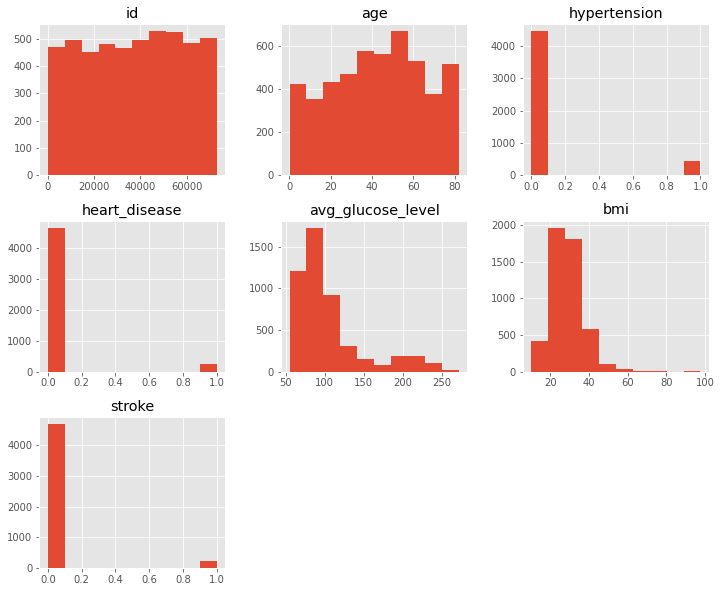

In [6]:
df.hist(figsize=(12,10))

'\nNo clear linear relationships, but clusters apparent\nClusters between glucose level + age and glucose level + bmi  \n'

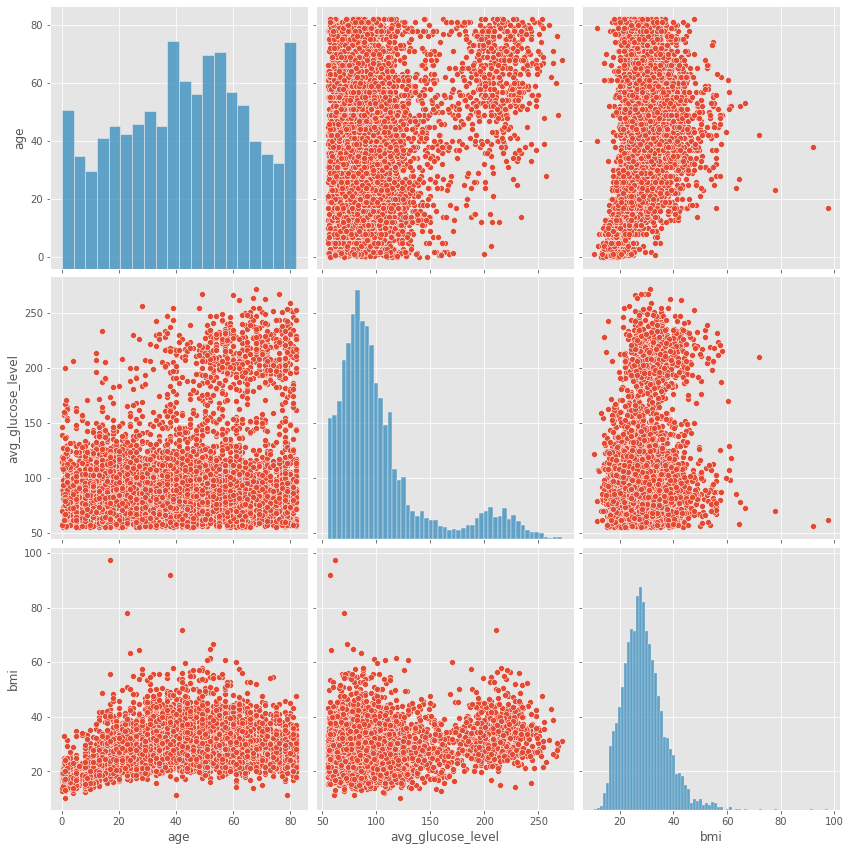

In [7]:
sns.pairplot(df[["age", "avg_glucose_level", "bmi"]], height = 4)

'''
No clear linear relationships, but clusters apparent
Clusters between glucose level + age and glucose level + bmi  
'''

'\nOverall:\n- The higher the age, the more have problems in general (strokes, heart dieseases, hypertension)\n- The higher the glucose level, the more seem to have strokes at an higher age!\n\nStrokes:\n- High age + high glucose level -> a lot of strokes\n- High age but high BMI -> not so many strokes\nHeart disease:\n- The higher the age, the more heart diseases\n- But high BMI does not seem to have a great influence\n- Avg glucose level does not seem to matter a lot too\nHypertension\n- Also, the higher the age, the more have hypertension, but definitely less clear than for other two\n- Interestingly, all outliers with very high BMI have also hypertension\n- Avg glucose level really does not influence it much\n'

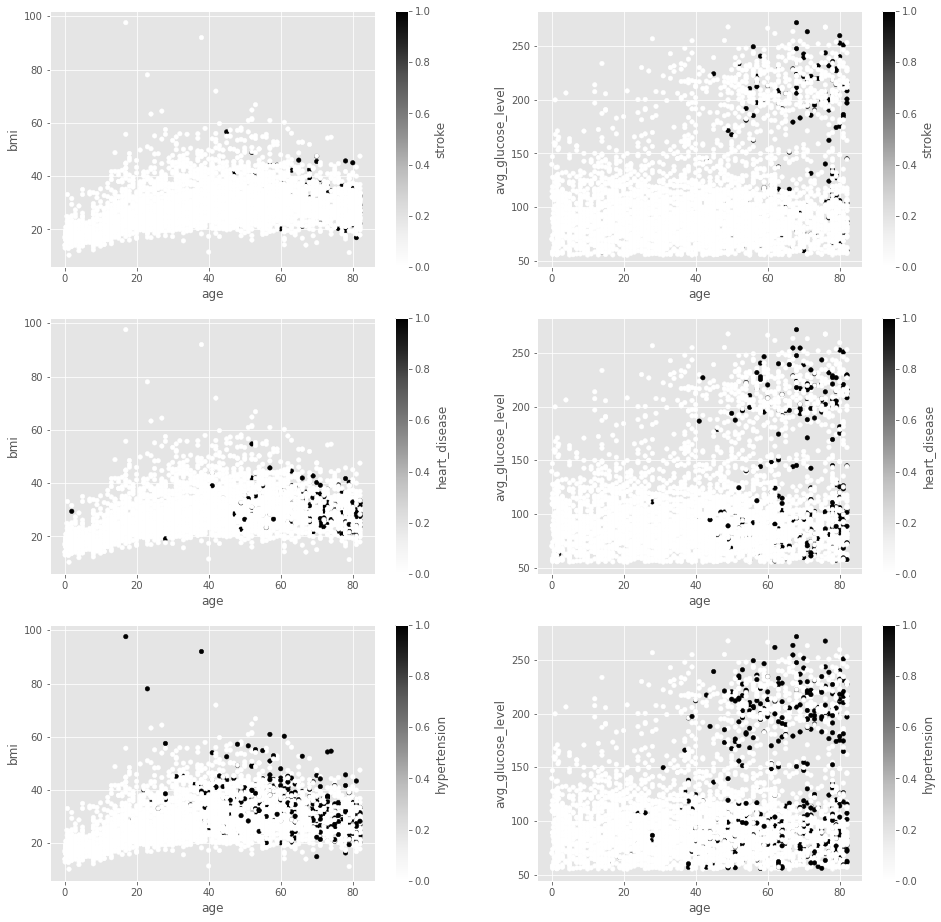

In [8]:
# Scatterplots two-variable relationships between age(discrete) and continuous variables and binary value (stroke, heart disease and hypertension)

fig, axs = plt.subplots(3,2, figsize=(16,16))
df.plot.scatter(ax = axs[0,0], x="age", y="bmi", c="stroke")
df.plot.scatter(ax = axs[0,1], x="age", y="avg_glucose_level", c="stroke")
df.plot.scatter(ax = axs[1,0], x="age", y="bmi", c="heart_disease")
df.plot.scatter(ax = axs[1,1], x="age", y="avg_glucose_level", c="heart_disease")
df.plot.scatter(ax = axs[2,0], x="age", y="bmi", c="hypertension")
df.plot.scatter(ax = axs[2,1], x="age", y="avg_glucose_level", c="hypertension")

'''
Overall:
- The higher the age, the more have problems in general (strokes, heart dieseases, hypertension)
- The higher the glucose level, the more seem to have strokes at an higher age!

Strokes:
- High age + high glucose level -> a lot of strokes
- High age but high BMI -> not so many strokes
Heart disease:
- The higher the age, the more heart diseases
- But high BMI does not seem to have a great influence
- Avg glucose level does not seem to matter a lot too
Hypertension
- Also, the higher the age, the more have hypertension, but definitely less clear than for other two
- Interestingly, all outliers with very high BMI have also hypertension
- Avg glucose level really does not influence it much
'''

# Correlation analysis

"\nWe can't see a strong positive correlation between any numerical value and a stroke\nThe largest positive correlation for a stroke is with age \n"

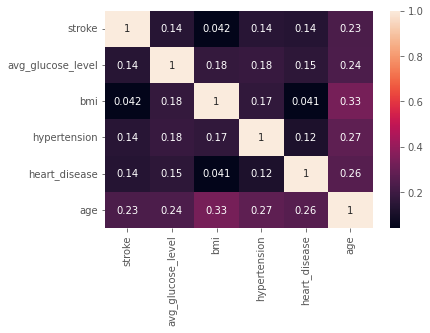

In [9]:
# Correlation heatmap (only between two variables)
# EDIT: Should not use pearson correlation coefficient for binary values (hypertension, heart_disease)...

numerical = df[["stroke", "avg_glucose_level", "bmi", "hypertension", "heart_disease", "age"]]

sns.heatmap(numerical.corr(), annot=True)
'''
We can't see a strong positive correlation between any numerical value and a stroke
The largest positive correlation for a stroke is with age 
'''

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
'''
Now want to find out how the relationship between categorical values is
Therefore use Chi Square Test of Independence
'''
# Conduct Chi-Square test of independence for categorical values
# https://pythonfordatascienceorg.wordpress.com/chi-square-python/  

'\nNow want to find out how the relationship between categorical values is\nTherefore use Chi Square Test of Independence\n'

In [12]:
from scipy.stats import chi2_contingency 
import numpy as np

'''
First look at smoking_status -> stroke!
'''

# Determine significance level
significance_level = 0.05

chisqt = pd.crosstab(df.smoking_status, df.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])
# first value chi-square, second value p-value, then degrees of freedom
if chi2_contingency(value)[1] <= significance_level:
    print("The two varibles have a significant correlation!")
else:
    print("The two varibles have NO significant correlation!")
chisqt

(35.32394354475238, 2.135517426342187e-08, 2)
The two varibles have a significant correlation!


stroke,0,1,All
smoking_status,,,
Unknown,1454,29,1483
formerly smoked,780,57,837
never smoked,1768,84,1852
smokes,698,39,737
All,4700,209,4909


In [13]:
'''
Now want to determine how much a category value contributes to stroke
Therefore conduct post hoc testing
Conduct multiple 2×2 Chi-square tests using the Bonferroni-adjusted p-value.
'''

'\nNow want to determine how much a category value contributes to stroke\nTherefore conduct post hoc testing\nConduct multiple 2×2 Chi-square tests using the Bonferroni-adjusted p-value.\n'

In [14]:
# Determine the Bonferroni-adjusted p-value
# The formula is p/N, where “p”= the original tests p-value and “N”= the number of planned pairwise comparisons
bonferroni_p = 0.05/3

In [15]:
dummies = pd.get_dummies(df['smoking_status'])
dummies.drop(["Unknown"], axis= 1, inplace= True)
dummies.head()

,formerly smoked,never smoked,smokes
0,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0


In [16]:
from scipy import stats
from math import sqrt
# Check whether they are significant and also calculate phi coefficient (like pearson)
# https://www.statisticshowto.com/phi-coefficient-mean-square-contingency-coefficient/ 
# https://en.wikipedia.org/wiki/Phi_coefficient

for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['stroke'])
    print(crosstab, nl)
    a = crosstab.loc[0][0] # needed for phi coefficient
    b = crosstab.loc[0][1]
    c = crosstab.loc[1][0]
    d = crosstab.loc[1][1]
    phi_coeff = (a*d-b*c)/sqrt((a+b)*(c+d)*(a+c)*(b+d))
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    significance = p <= bonferroni_p
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}Significant {significance}{nl}Phi coefficient {phi_coeff}")
    print()

stroke              0    1
formerly smoked           
0                3920  152
1                 780   57 

Chi2 value= 15.382674347634516
p-value= 8.778955974602996e-05
Degrees of freedom= 1
Significant True
Phi coefficient 0.05731971112330975

stroke           0    1
never smoked           
0             2932  125
1             1768   84 

Chi2 value= 0.46021147216058644
p-value= 0.49752515797485664
Degrees of freedom= 1
Significant False
Phi coefficient 0.010723194916526447

stroke     0    1
smokes           
0       4002  170
1        698   39 

Chi2 value= 1.9868583336693175
p-value= 0.15866975618323031
Degrees of freedom= 1
Significant False
Phi coefficient 0.021530425106828826



In [17]:
'''
Therefore:
Only the category value "formerly smoked" is significant
-> Means that a higher proportion of people who had a stroke also smoked formerly!
-> But VERY low phi coefficient, therefore no true correlation
(Note that correlation does not imply causality. That is, if A and B are correlated, this does not necessarily imply that A causes B or that B causes)
'''

'\nTherefore:\nOnly the category value "formerly smoked" is significant\n-> Means that a higher proportion of people who had a stroke also smoked formerly!\n-> But VERY low phi coefficient, therefore no true correlation\n(Note that correlation does not imply causality. That is, if A and B are correlated, this does not necessarily imply that A causes B or that B causes)\n'

In [18]:
'''
Next look at work_type -> stroke!
'''

# Determine significance level
significance_level = 0.05

chisqt = pd.crosstab(df.work_type, df.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])
# first value chi-square, second value p-value, then degrees of freedom
if chi2_contingency(value)[1] <= significance_level:
    print("The two varibles have a significant correlation!")
else:
    print("The two varibles have NO significant correlation!")
chisqt

(1.0216524216524219, 0.5999996477639713, 2)
The two varibles have NO significant correlation!


stroke,0,1,All
work_type,,,
Govt_job,602,28,630
Never_worked,22,0,22
Private,2684,127,2811
Self-employed,722,53,775
children,670,1,671
All,4700,209,4909


In [19]:
'''
Next look at residence type -> stroke!
'''
# Determine significance level
significance_level = 0.05

chisqt = pd.crosstab(df.Residence_type, df.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])
# first value chi-square, second value p-value, then degrees of freedom
if chi2_contingency(value)[1] <= significance_level:
    print("The two varibles have a significant correlation!")
else:
    print("The two varibles have NO significant correlation!")
chisqt

(0.178580118487631, 0.9145802526404281, 2)
The two varibles have NO significant correlation!


stroke,0,1,All
Residence_type,,,
Rural,2319,100,2419
Urban,2381,109,2490
All,4700,209,4909


In [20]:
'''
Next look at marriage -> stroke!
'''

# Determine significance level
significance_level = 0.05

chisqt = pd.crosstab(df.ever_married, df.stroke, margins=True)
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])
# first value chi-square, second value p-value, then degrees of freedom
if chi2_contingency(value)[1] <= significance_level:
    print("The two varibles have a significant correlation!")
else:
    print("The two varibles have NO significant correlation!")
chisqt

(54.21366152872632, 1.6890907249429603e-12, 2)
The two varibles have a significant correlation!


stroke,0,1,All
ever_married,,,
No,1682,23,1705
Yes,3018,186,3204
All,4700,209,4909


In [21]:
dummies = pd.get_dummies(df['ever_married'])
# dummies.drop(["Unknown"], axis= 1, inplace= True)
dummies.head()


,No,Yes
0,0,1
2,0,1
3,0,1
4,0,1
5,0,1


In [22]:
from scipy import stats
from math import sqrt
# Check whether they are significant and also calculate phi coefficient (like pearson)
# https://www.statisticshowto.com/phi-coefficient-mean-square-contingency-coefficient/ 
# https://en.wikipedia.org/wiki/Phi_coefficient

for series in dummies:
    nl = "\n"
    crosstab = pd.crosstab(dummies[f"{series}"], df['stroke'])
    print(crosstab, nl)
    a = crosstab.loc[0][0] # needed for phi coefficient
    b = crosstab.loc[0][1]
    c = crosstab.loc[1][0]
    d = crosstab.loc[1][1]
    phi_coeff = (a*d-b*c)/sqrt((a+b)*(c+d)*(a+c)*(b+d))
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    significance = p <= bonferroni_p
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}Significant {significance}{nl}Phi coefficient {phi_coeff}")
    print()

stroke     0    1
No               
0       3018  186
1       1682   23 

Chi2 value= 53.12593819801626
p-value= 3.1283412849388787e-13
Degrees of freedom= 1
Significant True
Phi coefficient -0.10508914386474447

stroke     0    1
Yes              
0       1682   23
1       3018  186 

Chi2 value= 53.12593819801626
p-value= 3.1283412849388787e-13
Degrees of freedom= 1
Significant True
Phi coefficient 0.10508914386474447



In [23]:
'''
Strongest correlation between so far between MARRIED and stroke :D 
With phi coefficient of 0.10, which is still REALLY low
'''

'\nStrongest correlation between so far between MARRIED and stroke :D \nWith phi coefficient of 0.10, which is still REALLY low\n'

In [24]:
numerical

,stroke,avg_glucose_level,bmi,hypertension,heart_disease,age
0,1,228.69,36.6,0,1,67.0
2,1,105.92,32.5,0,1,80.0
3,1,171.23,34.4,0,0,49.0
4,1,174.12,24.0,1,0,79.0
5,1,186.21,29.0,0,0,81.0
...,...,...,...,...,...,...
5104,0,103.08,18.6,0,0,13.0
5106,0,125.20,40.0,0,0,81.0
5107,0,82.99,30.6,0,0,35.0
5108,0,166.29,25.6,0,0,51.0


# Neural Network

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

num = df[["avg_glucose_level", "bmi", "age"]].copy()
labels = df[["stroke"]].copy()
# Initialize model
clf = MLPClassifier(solver="lbfgs", activation="logistic", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
# Split test set
X_train, X_test, y_train, y_test = train_test_split(num, labels, test_size=0.33, random_state=42)
# Fit model
clf.fit(X_train.values, y_train["stroke"].values)

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(5, 2),
              random_state=1, solver='lbfgs')

In [26]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [27]:
y_pred = clf.predict(X_test.values)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test["stroke"].values)

print(f"Accuracy of Classifier: {accuracy(cm)}")

Accuracy of Classifier: 0.9506172839506173


In [29]:
clf.score(X_test.values, y_test["stroke"].values)

0.9506172839506173

In [30]:
predictions = pd.DataFrame(y_pred)
predictions.columns = ["prediction"]

In [31]:
# df_results = 
df_intermed = pd.concat([X_test, y_test], axis=1).reset_index()
df_results = pd.concat([df_intermed, predictions], axis=1)
df_results[df_results["stroke"] == 1]


,index,avg_glucose_level,bmi,age,stroke,prediction
11,96,76.34,24.4,70.0,1,0
30,238,88.20,28.4,51.0,1,0
35,192,118.03,35.5,59.0,1,0
62,10,80.43,29.7,81.0,1,0
73,28,195.23,28.3,69.0,1,0
...,...,...,...,...,...,...
1572,130,190.14,36.5,73.0,1,0
1576,72,116.55,31.1,66.0,1,0
1577,93,68.56,26.2,80.0,1,0
1589,144,221.79,30.0,72.0,1,0


# Tasks

## General to-dos

- Preprocessing (except if obviously unnecessary)
- Descriptive statistics
- Appropriate visualization
- Appropriate validation of results


## Specifics for our project

- Adjust sampling of data: under vs oversampling

## Which algorithms to pick?

Clustering: We should investigate clusters to draw conclusions about stroke likelihood. Are there certain clusters that are more likely?
- K-Means
- K-Medoids
- Gaussian Mixture Models
- Hierarchical Clustering

Classification: (Supervised Learning):
- Logistic regression
- SVM
- Neural Networks

-> file:///C:/Users/laise/Desktop/Uni/Semester%203/Research%20Project/Readings/paper_immigration.pdf paper with good section on classifier design 


# Dealing with Imbalance

## Over-Sampling

https://towardsdatascience.com/the-struggles-and-the-tips-what-i-learn-from-doing-my-own-classification-project-dc1e70937b09

It's worth noting that while oversampling helps yield better results, it has some pitfalls, since it makes exact copies of the minority class examples. So if there's only 1 example in the minority class, we will have hundreds of its copies in the resampled dataframe. This is going to result in serious overfitting.

<AxesSubplot:xlabel='stroke', ylabel='count'>

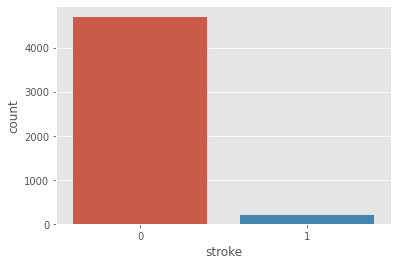

In [32]:
# Issue: imbalanced data set
sns.countplot(x="stroke", data=df)

In [33]:
y = df[["stroke"]].copy()
X = df.copy()
X_test = df.copy()
X.drop(columns= ["id", "stroke"], inplace=True)

In [34]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# SMOTENC (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point.
# Works for numerical and categorical features.
# The algorithm is one hot encoding my raw categorical features under the hood. This is something that i cannot understand as the original paper of SMOTE talks about median of standard deviation of continous features for the categorical features. So categorical features don't need to encoded before passing them to SMOTENC.

X_input = X.values # input must be 2d array
y_input = y.values.flatten() # should be 1d array


In [35]:
smote = SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 9], random_state=0)
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_input, y_input)

In [36]:
from typing import Counter
print(f'Original dataset samples per class {Counter(y_input)}')
print(f'Resampled dataset samples per class {Counter(y_smote)}')

Original dataset samples per class Counter({0: 4700, 1: 209})
Resampled dataset samples per class Counter({1: 4700, 0: 4700})


In [37]:
X_output = pd.DataFrame(x_smote)
X_output.set_axis(["gender", "age", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status"], axis=1, inplace=True)
X_output["stroke"] = y_smote

 # Datatypes are changed from int to float after oversampling, need to change it back 
float_int = ["age", "hypertension", "heart_disease"]
for col in float_int:
    X_output[col] = X_output[col].astype(int)

In [38]:
# Just using the script

from src.Resample import oversample

result = oversample(df)

Original dataset samples per class Counter({0: 4700, 1: 209})
Resampled dataset samples per class Counter({1: 4700, 0: 4700})


## Under-Sampling

In [39]:
y_under = df[["stroke"]].copy()
X_under = df.copy()
X_under.drop(columns= ["id", "stroke"], inplace=True)

### Random Undersampling

In [40]:
# Method 1:
# Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

X_random_resampled, y_random_resampled = rus.fit_resample(X_under, y_under)
X_random_resampled["stroke"] = y_random_resampled

# Result: 209 strokes and 209 non strokes.

### Undersamling using K-Means

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.

In [41]:
# Based on KMEANS -> ONE HOT ENCODING!

from sklearn.preprocessing import OneHotEncoder

# First encode all categorical columns
onehot_encoder = OneHotEncoder()

categorical = ["hypertension", "heart_disease", "gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
other = ["age", "avg_glucose_level", "bmi"]

# multi = MultiColumnOneHotEncoder(columns=categorical)

X_onehot = onehot_encoder.fit_transform(X_under[categorical])

other_as_array = np.array(X_under[other])

X_transformend = np.concatenate((X_onehot.toarray(), other_as_array), axis=1)

X_input = X_transformend # input must be 2d array
y_input = y_under.values.flatten() # should be 1d array


In [42]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)

X_kmeans_resampled, y_kmeans_resampled = cc.fit_resample(X_input, y_input)

from typing import Counter
print(f'Original dataset samples per class {Counter(y_input)}')
print(f'Resampled dataset samples per class {Counter(y_kmeans_resampled)}')


Original dataset samples per class Counter({0: 4700, 1: 209})
Resampled dataset samples per class Counter({0: 209, 1: 209})


In [43]:
reverse = onehot_encoder.inverse_transform(X_kmeans_resampled[:,:20])

In [44]:
X_combined = np.concatenate((X_kmeans_resampled[:,20:25], reverse), axis=1)

In [45]:
# Return dataframe and inverse encoding of categorical values
X_output = pd.DataFrame(X_combined)
X_output
X_output.set_axis(["age", "avg_glucose_lvl", "bmi", "hypertension", "heart_disease", "gender", "ever_married", "work_type", "Residence_type", "smoking_status"], axis=1, inplace=True)
X_output["stroke"] = y_kmeans_resampled

#  Datatypes are changed from int to float after undersampling, need to change it back 
float_int = ["age"]
for col in float_int:
    X_output[col] = X_output[col].astype(int)

X_output

,age,avg_glucose_lvl,bmi,hypertension,heart_disease,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,2,80.764,22.32,0,0,Female,No,children,Urban,Unknown,0
1,64,95.9605,29.0575,0,0,Female,Yes,Private,Rural,never smoked,0
2,69,189.976111,33.033333,0,0,Female,Yes,Private,Urban,never smoked,0
3,38,106.088077,27.842308,0,0,Female,Yes,Private,Rural,never smoked,0
4,57,65.314186,30.562791,0,0,Female,Yes,Private,Rural,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
413,68,247.51,40.5,1,1,Female,Yes,Private,Urban,formerly smoked,1
414,57,84.96,36.7,0,0,Male,Yes,Private,Rural,Unknown,1
415,14,57.93,30.9,0,0,Female,No,children,Rural,Unknown,1
416,75,78.8,29.3,0,0,Female,Yes,Self-employed,Rural,formerly smoked,1


In [48]:
from src.Resample import undersample_kmeans

undersampled = undersample_kmeans(df)

Original dataset samples per class Counter({0: 4700, 1: 209})
Resampled dataset samples per class Counter({0: 209, 1: 209})
